In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi

In [0]:
import subprocess
print(subprocess.getoutput('nvidia-smi'))

Mon May 18 03:43:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import os
import matplotlib.pyplot as plt

In [0]:
class CNN(object):
    def __init__(self):
        """
        Initialize multi-layer neural network

        """
        tf.keras.backend.clear_session()
        self.model = keras.models.Sequential()
        self.loss_metric = ""
        self.metric_val = ""
        self.lossList = []
        self.optimizer = ""
        self.y_test = ""
        self.y_pred = ""
        self.X_test = ""

    def add_input_layer(self, shape=(2,),name=""):
        """
         This function adds an input layer to the neural network. If an input layer exist, then this function
         should replcae it with the new input layer.
         Input layer is considered layer number 0 and it does not have any weights. Its purpose is to determine
         the shape of the input tensor and distribute it to the next layer.
         :param shape: input shape (tuple)
         :param name: Layer name (string)
         :return: None
         """
        print("Adding InputLayer with shape: ", shape)
        self.model.add(keras.layers.InputLayer(input_shape = shape, name = name))


    def append_dense_layer(self, num_nodes,activation="relu",name="",trainable=True):
        """
         This function adds a dense layer to the neural network
         :param num_nodes: Number of nodes
         :param activation: Activation function for the layer. Possible values are "Linear", "Relu", "Sigmoid",
         "Softmax"
         :param name: Layer name (string)
         :param trainable: Boolean
         :return: None
         """
        self.model.add(keras.layers.Dense(num_nodes, activation = activation, trainable = trainable,
                                    name=name))
         
    def append_conv2d_layer(self, num_of_filters, kernel_size=3, padding='same', strides=1,
                         activation="Relu",name="",trainable=True):
        """
         This function adds a conv2d layer to the neural network
         :param num_of_filters: Number of nodes
         :param num_nodes: Number of nodes
         :param kernel_size: Kernel size (assume that the kernel has the same horizontal and vertical size)
         :param padding: "same", "Valid"
         :param strides: strides
         :param activation: Activation function for the layer. Possible values are "Linear", "Relu", "Sigmoid"
         :param name: Layer name (string)
         :param trainable: Boolean
         :return: Layer object
         """
        
        self.model.add(keras.layers.Conv2D(filters=num_of_filters, kernel_size = kernel_size,
                                     activation=activation, strides = strides, padding=padding,
                            name=name))
         
        """
        self.model.add(keras.layers.Conv2D(filters=num_of_filters, kernel_size = kernel_size,
                                     activation=activation, name=name))
        """
        

    def append_maxpooling2d_layer(self, pool_size=2, padding="same", strides=2,name=""):
        """
         This function adds a maxpool2d layer to the neural network
         :param pool_size: Pool size (assume that the pool has the same horizontal and vertical size)
         :param padding: "same", "valid"
         :param strides: strides
         :param name: Layer name (string)
         :return: Layer object
         """
        return self.model.add(keras.layers.MaxPooling2D(pool_size=pool_size, padding=padding,
                                                  strides=strides, name=name))
         
         
    def append_flatten_layer(self,name=""):
        """
         This function adds a flattening layer to the neural network
         :param name: Layer name (string)
         :return: Layer object
         """
        return self.model.add(keras.layers.Flatten(name=name))
         
    def set_training_flag(self,layer_numbers=[],layer_names="",trainable_flag=True):
        """
        This function sets the trainable flag for a given layer
        :param layer_number: an integer or a list of numbers.Layer numbers start from layer 0.
        :param layer_names: a string or a list of strings (if both layer_number and layer_name are specified, layer number takes precedence).
        :param trainable_flag: Set trainable flag
        :return: None
        """

        layer_name_list = [layer.name for layer in self.model.layers]
        
        layer_num_list = []
        if layer_numbers == [] or layer_numbers == None:
            
            if type(layer_names) == str:
                layer_num_list = [layer_name_list.index(layer_names)] #If layer name is a single string
            else:
                for layer in layer_names:
                    layer_num_list.append(layer) #If layer name is a list
            for layer_num in layer_numbers:
                self.model.layers[layer_num].trainable = trainable_flag
                
        else:                    
            if type(layer_numbers)==int:
                layer_num_list = [layer_numbers] #If layer number is a single integer
            
            for layer_num in layer_numbers: #If layer number is a list
                self.model.layers[layer_num].trainable = trainable_flag


    def get_weights_without_biases(self,layer_number=None,layer_name=""):
        """
        This function should return the weight matrix (without biases) for layer layer_number.
        layer numbers start from zero. Note that layer 0 is the input layer.
        This means that the first layer with activation function is layer zero
         :param layer_number: Layer number starting from layer 0. Note that layer 0 is the input layer
         and it does not have any weights or biases.
         :param layer_name: Layer name (if both layer_number and layer_name are specified, layer number takes precedence).
         :return: Weight matrix for the given layer (not including the biases). If the given layer does not have
          weights then None should be returned.
         """
        if layer_number == None:
             #Use layer name to get biases
            if len(self.model.get_layer(layer_name).get_weights()) == 0:
                return None
            else:
                return self.model.get_layer(layer_name).get_weights()[0]
        else:        
            if layer_number == 0:
                return None
            elif len(self.model.layers[layer_number-1].get_weights()) == 0:
                return None
            elif layer_number < 0:
                return self.model.layers[layer_number].get_weights()[0]
            else:
                return self.model.layers[layer_number-1].get_weights()[0]


    def get_biases(self,layer_number=None,layer_name=""):
        """
        This function should return the biases for layer layer_number.
        layer numbers start from zero. Note that layer 0 is the input layer.
        This means that the first layer with activation function is layer zero
         :param layer_number: Layer number starting from layer 0.Note that layer 0 is the input layer
         and it does not have any weights or biases.
         :param layer_name: Layer name (if both layer_number and layer_name are specified, layer number takes precedence).
         :return: biases for the given layer (If the given layer does not have bias then None should be returned)
         """
        
        if layer_number == None:
            #Use layer_name to get biases
            
            if len(self.model.get_layer(layer_name).get_weights()) == 0:
                return None
            else:
                return self.model.get_layer(layer_name).get_weights()[1]
        
        else:            
            if layer_number == 0:
                return None 
            if len(self.model.layers[layer_number-1].get_weights()) == 0:
                return None
            elif layer_number < 0:
                return self.model.layers[layer_number].get_weights()[1]
            else:
                return self.model.layers[layer_number-1].get_weights()[1]
            

    def set_weights_without_biases(self,weights,layer_number=None,layer_name=""):
        """
        This function sets the weight matrix for layer layer_number.
        layer numbers start from zero. Note that layer 0 is the input layer.
        This means that the first layer with activation function is layer zero
         :param weights: weight matrix (without biases). Note that the shape of the weight matrix should be
          [input_dimensions][number of nodes]
         :param layer_number: Layer number starting from layer 0. Note that layer 0 is the input layer
         and it does not have any weights or biases.
         :param layer_name: Layer name (if both layer_number and layer_name are specified, layer number takes precedence).
         :return: None
         """

        layer_bias = self.get_biases(layer_number,layer_name)
        if layer_number == None:
            #Use layer_name to get biases
            
            if len(self.model.get_layer(layer_name).get_weights()) == 0:
                return None
            else:
                self.model.get_layer(layer_name).set_weights([weights, layer_bias])
        
        else:            
            if layer_number == 0:
                return None
            if len(self.model.layers[layer_number-1].get_weights()) == 0:
                return None
            elif layer_number < 0:
                self.model.layers[layer_number].set_weights([weights, layer_bias])
            else:
                self.model.layers[layer_number-1].set_weights([weights, layer_bias])
        
            
    def set_biases(self,biases,layer_number=None,layer_name=""):
        """
        This function sets the biases for layer layer_number.
        layer numbers start from zero. Note that layer 0 is the input layer.
        This means that the first layer with activation function is layer zero
        :param biases: biases. Note that the biases shape should be [1][number_of_nodes]
        :param layer_number: Layer number starting from layer 0. Note that layer 0 is the input layer
         and it does not have any weights or biases.
        :param layer_name: Layer name (if both layer_number and layer_name are specified, layer number takes precedence).
        :return: none
        """       

        layer_weight = self.get_weights_without_biases(layer_number, layer_name)
        if layer_number == None:
            #Use layer_name to get biases
            
            if len(self.model.get_layer(layer_name).get_weights()) == 0:
                return None
            else:
                self.model.get_layer(layer_name).set_weights([layer_weight, biases])
        
        else:            
            if layer_number == 0:
                return None
            if len(self.model.layers[layer_number-1].get_weights()) == 0:
                return None
            elif layer_number < 0:
                self.model.layers[layer_number].set_weights([layer_weight, biases])
            else:
                self.model.layers[layer_number-1].set_weights([layer_weight, biases])
        
    def remove_last_layer(self):
        """
        This function removes a layer from the model.
        :return: removed layer
        """

        newModel = tf.keras.models.Sequential()
        for layer in self.model.layers[:-1]: # go through until last layer
            newModel.add(layer)
            
        #Copied all layers except the last one into a temporary model
        
        self.model = keras.models.Sequential()
        for layer in newModel.layers:
            self.model.add(layer)
        
        #Added all those layers from the temporary model to a new self.model
        return self.model
        

    def load_a_model(self,model_name="",model_file_name=""):
        """
        This function loads a model architecture and weights.
        :param model_name: Name of the model to load. model_name should be one of the following:
        "VGG16", "VGG19"
        :param model_file_name: Name of the file to load the model (if both madel_name and
         model_file_name are specified, model_name takes precedence).
        :return: model
        """
        self.model = keras.models.Sequential()
        
        if model_name == "":
            loadModel = keras.models.load_model(model_file_name)
        elif model_name == "VGG16":
            loadModel = keras.applications.vgg16.VGG16(include_top=False,input_tensor=keras.Input(shape=(32, 32, 3)))
        elif model_name == "VGG19":
            loadModel = keras.applications.vgg19.VGG19()
        
        for layer in loadModel.layers:
            self.model.add(layer)
            
    def save_model(self,model_file_name=""):
        """
        This function saves the current model architecture and weights together in a HDF5 file.
        :param file_name: Name of file to save the model.
        :return: model
        """
        return self.model.save(model_file_name)


    def set_loss_function(self, loss="SparseCategoricalCrossentropy"):
        """
        This function sets the loss function.
        :param loss: loss is a string with the following choices:
        "SparseCategoricalCrossentropy",  "MeanSquaredError", "hinge".
        :return: none
        """
        
        if loss == "SparseCategoricalCrossentropy":
            self.loss_metric = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        elif loss == "MeanSquaredError":
            self.loss_metric = tf.keras.losses.mean_squared_error()
        elif loss == "hinge":
            self.loss_metric = tf.keras.losses.hinge()
        else:
            print("Unidentified loss function passed!")

    def set_metric(self,metric):
        """
        This function sets the metric.
        :param metric: metric should be one of the following strings:
        "accuracy", "mse".
        :return: none
        """
        self.param_metric = metric

    def set_optimizer(self,optimizer="SGD",learning_rate=0.01,momentum=0.0):
        """
        This function sets the optimizer.
        :param optimizer: Should be one of the following:
        "SGD" , "RMSprop" , "Adagrad" ,
        :param learning_rate: Learning rate
        :param momentum: Momentum
        :return: none
        """
        if optimizer == "SGD":
            self.optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
        elif optimizer == "RMSprop":
            self.optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate, momentum=momentum)
        elif optimizer == "Adagrad":
            self.optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)
        else:
            print("Unidentified optimizer passed!")

    def predict(self, X):
        """
        Given array of inputs, this function calculates the output of the multi-layer network.
        :param X: Input tensor.
        :return: Output tensor.
        """
        
        X = tf.cast(X, tf.float32)
        return self.model.predict(X)

    def evaluate(self,X,y):
        """
         Given array of inputs and desired ouputs, this function returns the loss value and metrics of the model.
         :param X: Array of input
         :param y: Array of desired (target) outputs
         :return: loss value and metric value
         """
         
        loss_val, metric_val = self.model.evaluate(X,  y, verbose=2)
        return loss_val, metric_val
    """
    def compileModel(self):
      print("Compiling model...")
      self.model.compile(optimizer=self.optimizer,
              loss=self.loss_metric,
              metrics=[self.param_metric])
    """
    
    def train(self, X_train, y_train, batch_size, num_epochs):
        """
         Given a batch of data, and the necessary hyperparameters,
         this function trains the neural network by adjusting the weights and biases of all the layers.
         :param X_train: Array of input
         :param y_train: Array of desired (target) outputs
         :param batch_size: number of samples in a batch
         :param num_epochs: Number of times training should be repeated over all input data
         :return: list of loss values. Each element of the list should be the value of loss after each epoch.
         """
        print("Using optimizer - ", self.optimizer)
        print("Using loss metric - ", self.loss_metric)
        print("Using loss param - ", self.param_metric)
        print("Batch size - ", batch_size)
        print("num_epochs - ", num_epochs)
        print("X_train shape - ", X_train.shape)
        print("y_train shape - ", y_train.shape)
        print("X_test shape - ", self.X_test.shape)
        print("y_test shape - ", self.y_test.shape)

        self.model.compile(optimizer=self.optimizer,
              loss=self.loss_metric,
              metrics=[self.param_metric])
        
        """
        self.model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        """
        history = self.model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(self.X_test, self.y_test))
        
        #history = self.model.fit(X_train, y_train, epochs=num_epochs, validation_data=(self.X_test, self.y_test))


        #history = self.model.fit(X_train, y_train, epochs=10)
        
        #evalModel = self.evaluate(X_test, y_test)
        #self.lossList.append(evalModel[0])
        #print("Average test loss: ", np.average(history.history['loss']))
        #return self.lossList

        

In [0]:
from tensorflow.keras.datasets import cifar10
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

"""
X_train = tf.cast(X_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
"""

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

"""
number_of_train_samples_to_use = 100
X_train = X_train[0:number_of_train_samples_to_use, :]
y_train = y_train[0:number_of_train_samples_to_use]
"""

170500096/170498071 [==============================] - 11s 0us/step


'\nnumber_of_train_samples_to_use = 100\nX_train = X_train[0:number_of_train_samples_to_use, :]\ny_train = y_train[0:number_of_train_samples_to_use]\n'

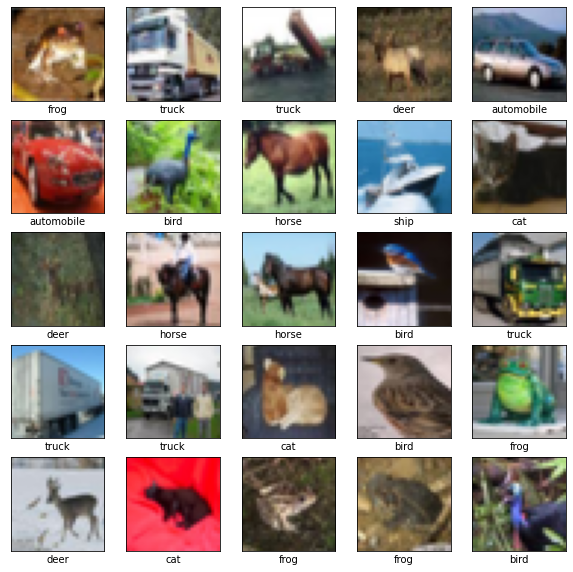

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [0]:
my_cnn=CNN()
my_cnn.X_test = X_test
my_cnn.y_test = y_test

my_cnn.add_input_layer(shape=(32,32,3),name="input")
my_cnn.append_conv2d_layer(num_of_filters=32, kernel_size=(3,3), activation='relu', name="conv1")
my_cnn.append_maxpooling2d_layer(pool_size=2, name="pool1")
my_cnn.append_conv2d_layer(num_of_filters=64, kernel_size=3, activation='relu', name="conv2")
my_cnn.append_maxpooling2d_layer(pool_size=2, name="pool2")
my_cnn.append_conv2d_layer(num_of_filters=64, kernel_size=3, activation='relu', name="conv3")
my_cnn.append_flatten_layer(name="flat1")
my_cnn.append_dense_layer(num_nodes=64,activation="relu",name="dense1")
my_cnn.append_dense_layer(num_nodes=10,activation="relu",name="dense2")
print(my_cnn.model.summary())

"""
my_cnn.remove_last_layer()

print("Model after removing the last layer:")
print(my_cnn.model.summary())
"""



Adding InputLayer with shape:  (32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 64)          36928     
_________________________________________________________________
flat1 (Flatten)              (None, 4096)              0         
_________________________________________________________________
dense1 (Den

'\nmy_cnn.remove_last_layer()\n\nprint("Model after removing the last layer:")\nprint(my_cnn.model.summary())\n'

In [0]:
"""
my_cnn=CNN()
my_cnn.X_test = X_test
my_cnn.y_test = y_test

my_cnn.model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
my_cnn.model.add(keras.layers.MaxPooling2D((2, 2)))
my_cnn.model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
my_cnn.model.add(keras.layers.MaxPooling2D((2, 2)))
my_cnn.model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
my_cnn.model.add(keras.layers.Flatten())
my_cnn.model.add(keras.layers.Dense(64, activation='relu'))
my_cnn.model.add(keras.layers.Dense(10))
print(my_cnn.model.summary())

my_cnn.remove_last_layer()
print("Model after removing last layer")
print(my_cnn.model.summary())
"""


'\nmy_cnn=CNN()\nmy_cnn.X_test = X_test\nmy_cnn.y_test = y_test\n\nmy_cnn.model.add(keras.layers.Conv2D(32, (3, 3), activation=\'relu\', input_shape=(32, 32, 3)))\nmy_cnn.model.add(keras.layers.MaxPooling2D((2, 2)))\nmy_cnn.model.add(keras.layers.Conv2D(64, (3, 3), activation=\'relu\'))\nmy_cnn.model.add(keras.layers.MaxPooling2D((2, 2)))\nmy_cnn.model.add(keras.layers.Conv2D(64, (3, 3), activation=\'relu\'))\nmy_cnn.model.add(keras.layers.Flatten())\nmy_cnn.model.add(keras.layers.Dense(64, activation=\'relu\'))\nmy_cnn.model.add(keras.layers.Dense(10))\nprint(my_cnn.model.summary())\n\nmy_cnn.remove_last_layer()\nprint("Model after removing last layer")\nprint(my_cnn.model.summary())\n'

In [0]:
#LOAD THE VGG19 MODEL
my_cnn=CNN()
my_cnn.X_test = X_test
my_cnn.y_test = y_test
my_cnn.load_a_model("VGG16")
#my_cnn.remove_last_layer()
my_cnn.append_dense_layer(num_nodes=10,activation="relu",name="dense2")
print(my_cnn.model.summary())

In [0]:

from keras.applications.vgg16 import VGG16
import keras
# load the model
model = VGG16(include_top=False,input_tensor=keras.Input(shape=(32, 32, 3)))
#model.add(layers.Dense(10))
model.summary()

my_cnn.X_test = X_test
my_cnn.y_test = y_test

In [0]:
"""
my_cnn.y_pred = my_cnn.predict(X_test)
my_cnn.y_true = y_test
"""
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)



#TRAIN MODEL
my_cnn.set_loss_function("SparseCategoricalCrossentropy") #"SparseCategoricalCrossentropy",  "MeanSquaredError", "hinge"
my_cnn.set_metric('accuracy') #"accuracy", "mse"
my_cnn.set_optimizer(optimizer="SGD",learning_rate=0.01,momentum=0.0) #"SGD" , "RMSprop" , "Adagrad"
my_cnn.train(X_train, y_train, batch_size=10, num_epochs=10)
#my_cnn.evaluate(X_test, y_test)


Using optimizer -  <keras.optimizers.SGD object at 0x7f91e44f3c50>
Using loss metric -  <tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x7f91e439cc88>
Using loss param -  accuracy
Batch size -  10
num_epochs -  10
X_train shape -  (50000, 32, 32, 3)
y_train shape -  (50000, 1)
X_test shape -  (10000, 32, 32, 3)
y_test shape -  (10000, 1)
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 177s 4ms/step - loss: 1.6627 - accuracy: 0.4368 - val_loss: 1.4747 - val_accuracy: 0.4815
Epoch 2/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.4507 - accuracy: 0.5080 - val_loss: 1.4226 - val_accuracy: 0.4981
Epoch 3/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.3715 - accuracy: 0.5324 - val_loss: 1.4285 - val_accuracy: 0.5039
Epoch 4/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.3184 - accuracy: 0.5480 - val_loss: 1.3996 - val_accuracy: 

313/313 - 1s - loss: 0.8931 - accuracy: 0.7142


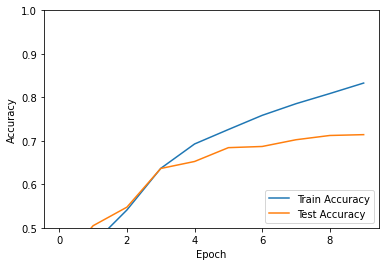

In [0]:
plt.plot(my_cnn.model.history.history['accuracy'], label='Train Accuracy')
plt.plot(my_cnn.model.history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_cnn.evaluate(X_test,  y_test)
plt.show()  

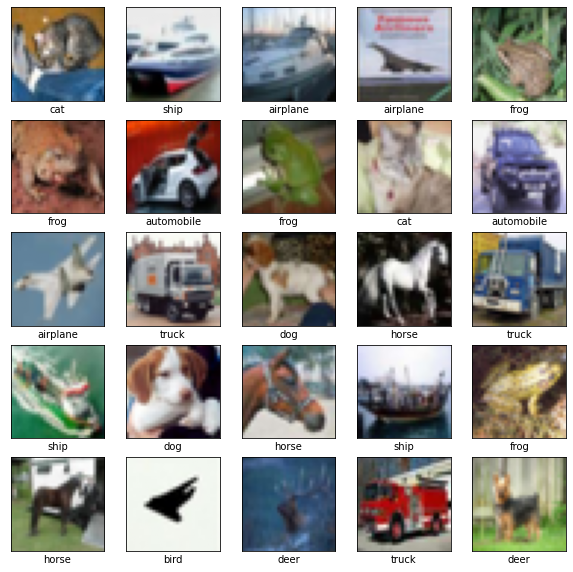

"\nclass_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',\n               'dog', 'frog', 'horse', 'ship', 'truck']\n"

In [0]:
from keras.applications.vgg16 import decode_predictions
ypred = my_cnn.predict(X_test[0:25])

"""
#Writing a for loop to give predictions for the first 25 images in the test set
for i in range(len(ypred)):
  pred_index = np.argmax(ypred[i])
  print("Class name = ", class_names[pred_index])
"""

plt.figure(figsize=(10,10))
for i in range(len(ypred)):
    pred_index = np.argmax(ypred[i])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[pred_index])
plt.show()

"""
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
"""
